# **Q-1)**
Create the following data and write to a csv file: Generate 10 random points in each of the the following circles

**(i)** centre at (3,3) and radius 2, 

**(ii)** centre at (7,7) and radius 2 

**(iii)** centre at (11,11) and radius 2. 

**Plot the data as well.** 

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [14]:
# Function to generate random points in a circle
def generate_points(cx, cy, r, num_points):
    
    """
    Convert the polar coordinates (r, θ) to Cartesian coordinates (x, y) using the following formulas:
    x=r⋅cos(θ) + cx
    y=r⋅sin(θ) + cy
    where (cx, cy) is the center of the circle.
    """
    
    points = []
    for _ in range(num_points):
        # Random angle
        alpha = 2 * np.pi * np.random.random()
        # Random radius
        r = r * np.sqrt(np.random.random())
        # Calculating coordinates
        x = r * np.cos(alpha) + cx
        y = r * np.sin(alpha) + cy
        points.append((x, y))
    return points

# Function to plot a circle
def plot_circle(cx, cy, r, color):
    theta = np.linspace(0, 2*np.pi, 100)
    x = r * np.cos(theta) + cx
    y = r * np.sin(theta) + cy
    plt.plot(x, y, color=color)
    
    
# Set seed for reproducibility
np.random.seed(0)
    

In [15]:
# Define the circles
circles = [(3, 3, 2), (7, 7, 2), (11, 11, 2)]
colors = ['red', 'green', 'blue']  # Colors for the points and circles
num_points = 10


In [16]:
# Generate the points
all_points = []
for i, circle in enumerate(circles):
    points = generate_points(*circle, num_points)
    all_points.extend([(x, y, colors[i]) for (x, y) in points])

# Print the points
for point in all_points:
    print(point)


(1.3875528010208775, 2.4893420949460783, 'red')
(2.002827140723671, 2.248717814465948, 'red')
(2.1098486650939026, 3.4630729359043855, 'red')
(2.1243835978006, 3.362130188186092, 'red')
(3.5715189398530613, 2.867198876427884, 'red')
(3.11059221366095, 2.5878689093415126, 'red')
(2.626421585299049, 2.829781673565742, 'red')
(3.1093078284656817, 3.0523081714120384, 'red')
(3.1096823809158414, 3.0140090452436543, 'red')
(3.0181513075850144, 2.8984730850903433, 'red')
(8.771803005072716, 6.760524806958659, 'green')
(5.466462250647341, 7.3785872088591535, 'green')
(7.9304372516666914, 7.854945552572465, 'green')
(7.7627290314562964, 7.962572430480231, 'green')
(6.2165954686533444, 6.891775850400877, 'green')
(6.936447604665257, 7.692960344014862, 'green')
(6.495140055297612, 7.142726597105509, 'green')
(7.409448810887262, 7.048565290071249, 'green')
(6.753204099973695, 6.790298235584985, 'green')
(7.250886384737891, 6.907439684902934, 'green')
(10.16037243878694, 12.021348801168717, 'blue')

In [17]:
# Write to CSV
df = pd.DataFrame(all_points, columns=['x', 'y', 'color'])
df.to_csv('points.csv', index=False)


# Plotting the points and circles

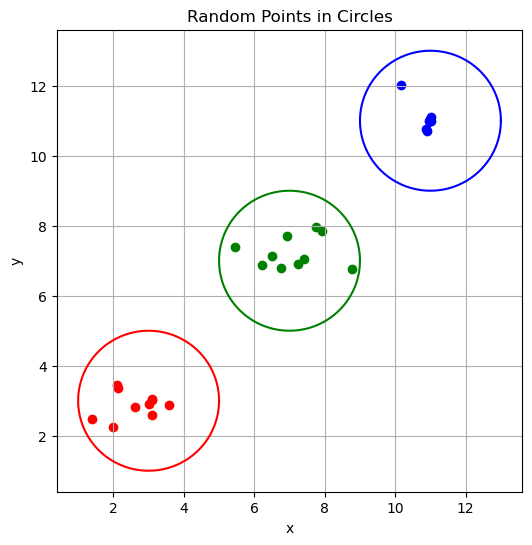

In [18]:
# Plot the points and circles
plt.figure(figsize=(6, 6))
for color in colors:
    df_color = df[df['color'] == color]
    plt.scatter(df_color['x'], df_color['y'], color=color)
for i, circle in enumerate(circles):
    plot_circle(*circle, color=colors[i])
plt.xlabel('x')
plt.ylabel('y')
plt.title('Random Points in Circles')
plt.grid(True)
plt.show()


# Q-2

- **Implement K - means clustering algorithm and for the above data, show the change in the centroid as well as the class assignments. Also, plot the cost function for K varying from 1 to 5.** 

- **Show that the value of K matches with the intuition from the data.**

- **Plot the K-classes for the final K-value.** 

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv('points.csv')

# Extract features
X = df[['x', 'y']].values

# Function to calculate Euclidean distance between two points
def euclidean_distance(point1, point2):
    return np.sqrt(np.sum((point1 - point2) ** 2))

# Function to initialize centroids randomly
def initialize_centroids(X, K):
    indices = np.random.choice(X.shape[0], K, replace=False)
    return X[indices]

# Function to assign each data point to the nearest centroid
def assign_to_clusters(X, centroids):
    clusters = []
    for point in X:
        distances = [euclidean_distance(point, centroid) for centroid in centroids]
        cluster = np.argmin(distances)
        clusters.append(cluster)
    return np.array(clusters)

# Function to update centroids based on the mean of data points in each cluster
def update_centroids(X, clusters, K):
    centroids = np.zeros((K, X.shape[1]))
    for k in range(K):
        cluster_points = X[clusters == k]
        if len(cluster_points) > 0:
            centroids[k] = np.mean(cluster_points, axis=0)
    return centroids

# Function to calculate cost (inertia) for a given value of K
def calculate_cost(X, centroids, clusters):
    cost = 0
    for k, centroid in enumerate(centroids):
        cluster_points = X[clusters == k]
        if len(cluster_points) > 0:
            cost += np.sum((cluster_points - centroid) ** 2)
    return cost / len(X)

# Function to perform K-means clustering
def kmeans(X, K, max_iters=10):
    centroids = initialize_centroids(X, K)
    centroid_history = [centroids]
    for _ in range(max_iters):
        clusters = assign_to_clusters(X, centroids)
        centroids = update_centroids(X, clusters, K)
        centroid_history.append(centroids)
    return clusters, centroids, centroid_history

# Elbow Method visualization

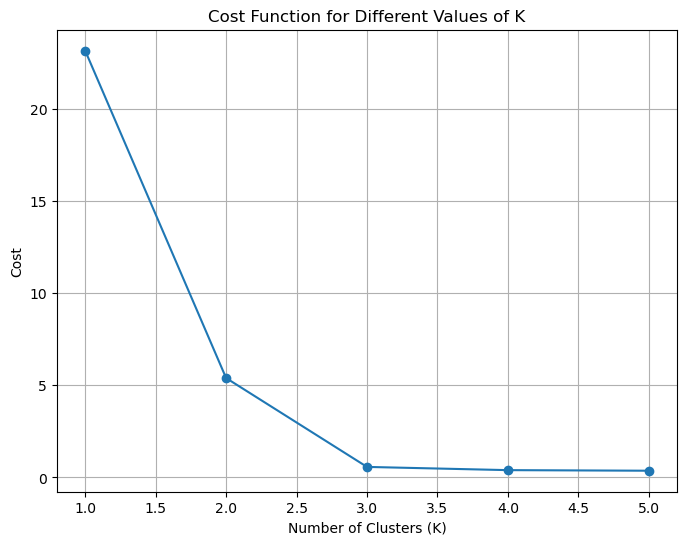

In [20]:
# Function to plot the cost function for K varying from 1 to max_K
def plot_cost_function(X, max_K):
    costs = []
    for K in range(1, max_K + 1):
        _, _, centroid_history = kmeans(X, K)
        cost = calculate_cost(X, centroid_history[-1], assign_to_clusters(X, centroid_history[-1]))
        costs.append(cost)
    plt.figure(figsize=(8, 6))
    plt.plot(range(1, max_K + 1), costs, marker='o')
    plt.xlabel('Number of Clusters (K)')
    plt.ylabel('Cost')
    plt.title('Cost Function for Different Values of K')
    plt.grid(True)
    plt.show()

# Perform K-means clustering for each value of K and visualize the results
max_K = 5  # Maximum number of clusters to consider

# Plot the cost function for K varying from 1 to max_K
plot_cost_function(X, max_K)

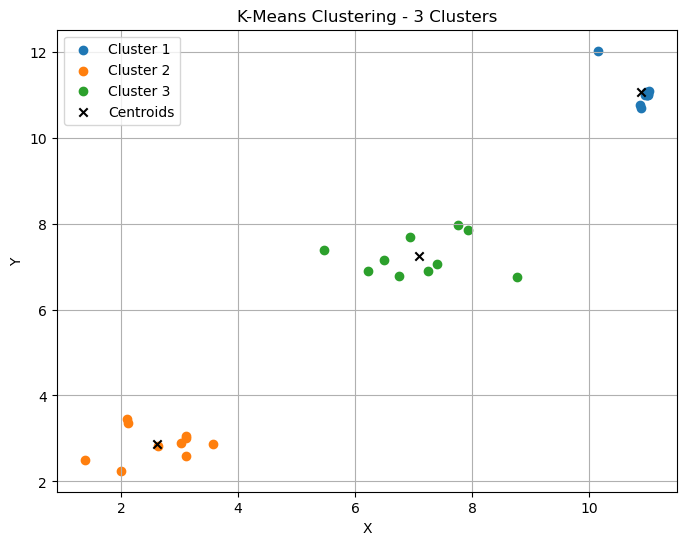

In [23]:
# Function to plot the clusters and centroids
def plot_clusters(X, clusters, centroids):
    plt.figure(figsize=(8, 6))
    for k in range(centroids.shape[0]):
        cluster_points = X[clusters == k]
        plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {k+1}')
    plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', color='black', label='Centroids')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title(f'K-Means Clustering - {centroids.shape[0]} Clusters')
    plt.legend()
    plt.grid(True)
    plt.show()



# Choose the optimal K based on the elbow method (here, we can observe visually)
optimal_K = 3  # Based on the plot, the elbow point is at K=3

# Perform K-means clustering with the optimal K
clusters, centroids, _ = kmeans(X, optimal_K)

# Plot the final clustering result
plot_clusters(X, clusters, centroids)


# Visualize the results for the last 4 iterations

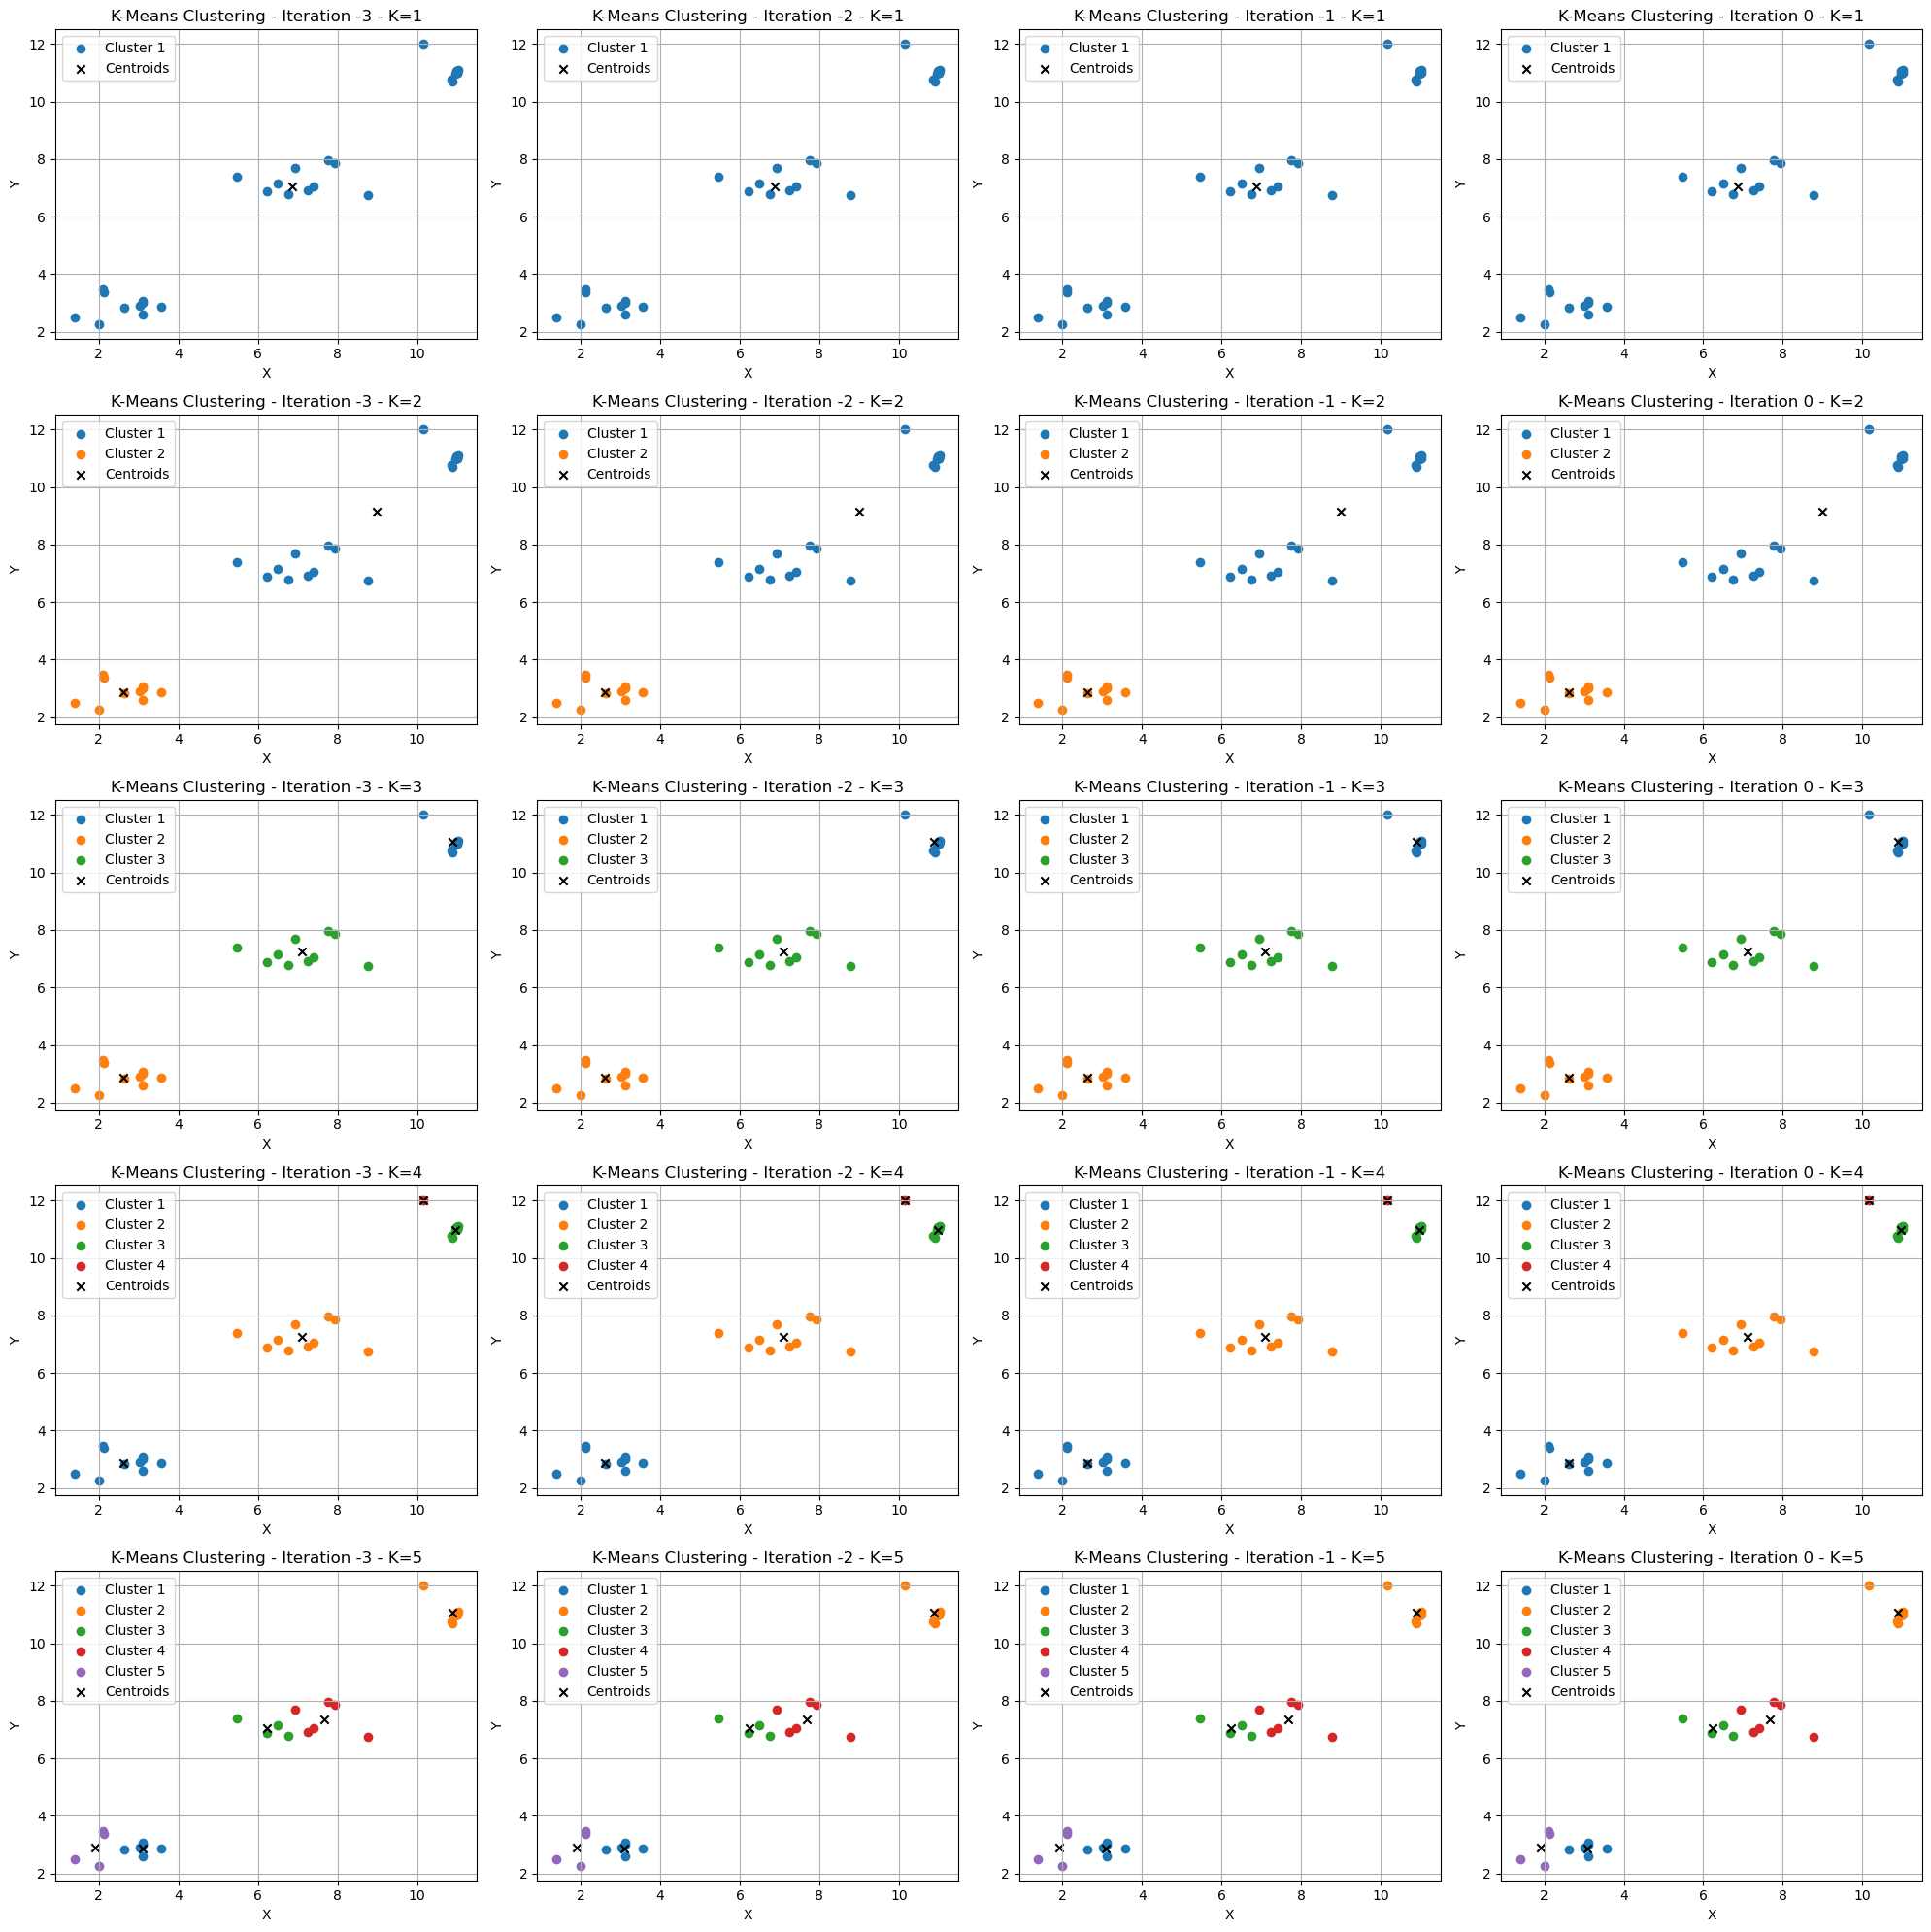

In [22]:

# Function to plot the clusters and centroids
def plot_clusters(X, clusters, centroids, iteration, K, ax):
    for k in range(K):
        cluster_points = X[clusters == k]
        ax.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {k+1}')
    ax.scatter(centroids[:, 0], centroids[:, 1], marker='x', color='black', label='Centroids')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_title(f'K-Means Clustering - Iteration {iteration + 1} - K={K}')
    ax.legend()
    ax.grid(True)

# Perform K-means clustering for each value of K and visualize the results for the last 4 iterations
max_K = 5  # Maximum number of clusters to consider

fig, axes = plt.subplots(max_K, 4, figsize=(20, 20))

for K in range(1, max_K + 1):
    clusters, centroids, centroid_history = kmeans(X, K)
    for i, iteration in enumerate(range(-4, 0)):
        plot_clusters(X, clusters, centroid_history[iteration], iteration, K, axes[K-1, i])

plt.tight_layout()
plt.show()
